# **1. Thư viện**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load dataset
data_path = "daily-min-temperatures.csv"
df = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# **2. Tiền xử lý dữ liệu**

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[['Temp']])

In [5]:
# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [6]:
# Define window size
window_size = 60
X, y = create_sequences(data_scaled, window_size)

In [7]:
# Split data
split_time = int(len(X) * 0.8)
X_train, X_test = X[:split_time], X[split_time:]
y_train, y_test = y[:split_time], y[split_time:]

In [8]:
# Ensure correct shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# **3. Xây dựng mô hình**

In [9]:
# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

c:\DEV\python_code\7-Day-Machine-Learning-to-Deep-Learning\Day5_RNN, LSTM, GRU - Dự Báo Chuỗi Thời Gian\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0768 - val_loss: 0.0113
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0124 - val_loss: 0.0105
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0119 - val_loss: 0.0099
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0118 - val_loss: 0.0100
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0120 - val_loss: 0.0097
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0121 - val_loss: 0.0096
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0113 - val_loss: 0.0097
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0112 - val_loss: 0.0095
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0110 - val_loss: 0.0096
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


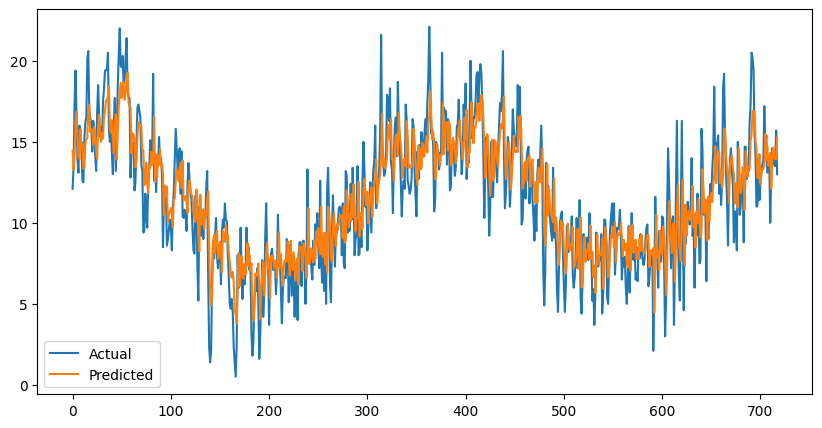

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()

# **Nhận xét về biểu đồ:**
- Dự đoán khá sát với thực tế: Đường màu cam (Predicted) theo khá sát đường màu xanh (Actual), điều này cho thấy mô hình đã học được xu hướng của dữ liệu.

- Mô hình có khả năng bắt được tính chu kỳ: Có vẻ như mô hình đã nắm được các biến động theo mùa, vì đường dự đoán dao động cùng tần suất với dữ liệu thực tế.

- Một số điểm lệch lớn: Ở một số khu vực (như khoảng 400 - 500), có thể thấy dự đoán hơi lệch so với thực tế. Điều này có thể do:

    - Mô hình chưa đủ phức tạp để nắm bắt toàn bộ biến động.

    - Cần thêm dữ liệu hoặc tinh chỉnh hyperparameter để cải thiện dự đoán.